In [1]:
from sklearn.tree import DecisionTreeClassifier
# 의사결정트리 분류
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 생성
decTree = DecisionTreeClassifier(random_state = 156)

In [3]:
# 붓꽃데이터 fheld
Iris_data = load_iris()
Iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# test_size=20%
X_train, X_test, y_train, y_test = train_test_split(Iris_data.data, Iris_data.target, test_size=0.2, random_state=11)
decTree.fit(X_train, y_train)
# random_state=1 이라고 하면 바로 이 random 함수의 seed 값을 고정, 연습과, 실제로 해봤을 때 결과값이 달라질 수 있기 때문에 고정시킴

DecisionTreeClassifier(random_state=156)

In [11]:
# 테스트데이터 예측하여 정확도 구해보기
from sklearn.metrics import accuracy_score

y_pred_te = decTree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_te))

Accuracy: 0.93


In [5]:
from sklearn.tree import export_graphviz

# export_graphviz( )는 시각화, out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(decTree, out_file="tree.dot", class_names = Iris_data.target_names, 
                           feature_names = Iris_data.feature_names, impurity=True, filled=True)#feature는 컬럼이름, classname은 변수값 
# filled노트 클래스 구분되도록 색칠

In [6]:
!pip install graphviz

In [7]:
print('===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================


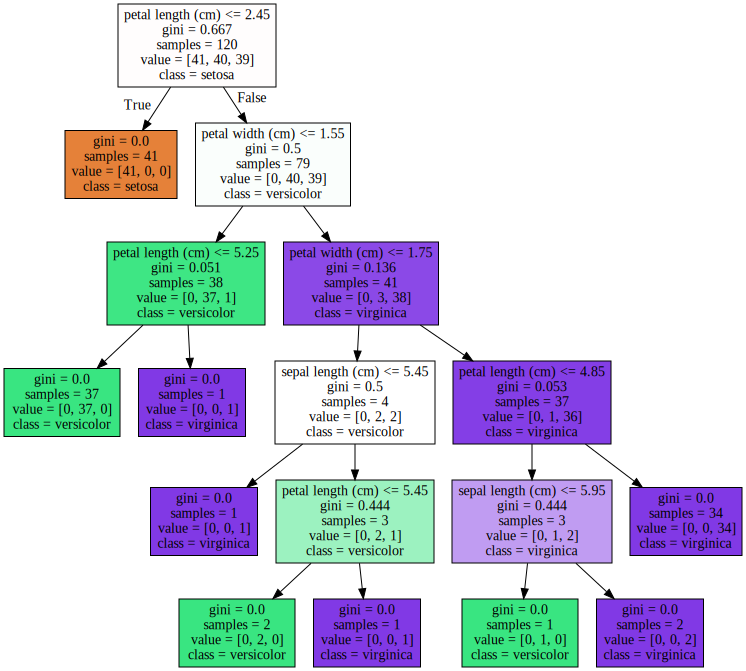

In [15]:
graphviz.Source(dot_graph)

In [17]:
# DecicionTreeClassifier 생성 (max_depth = 3 으로 제한)
decTree2 = DecisionTreeClassifier(max_depth=3 ,random_state=156)
# max_depth = tree 최대 깊이
decTree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

===============max_depth=3인 경우의 Decision Tree 시각화==================


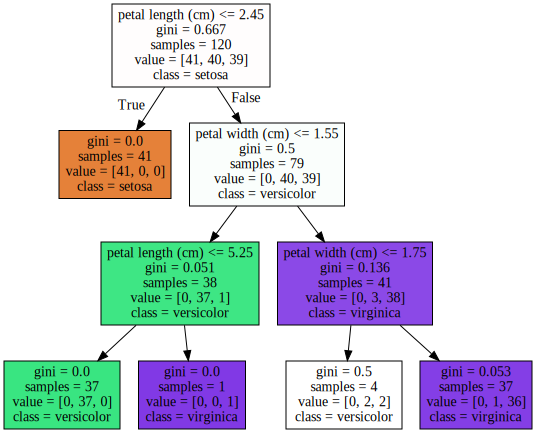

In [21]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(decTree2, out_file="tree.dot", class_names = Iris_data.target_names, 
                           feature_names = Iris_data.feature_names, impurity=True, filled=True)

print('===============max_depth=3인 경우의 Decision Tree 시각화==================')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

===============min_samples_split=4인 경우의 Decision Tree 시각화==================


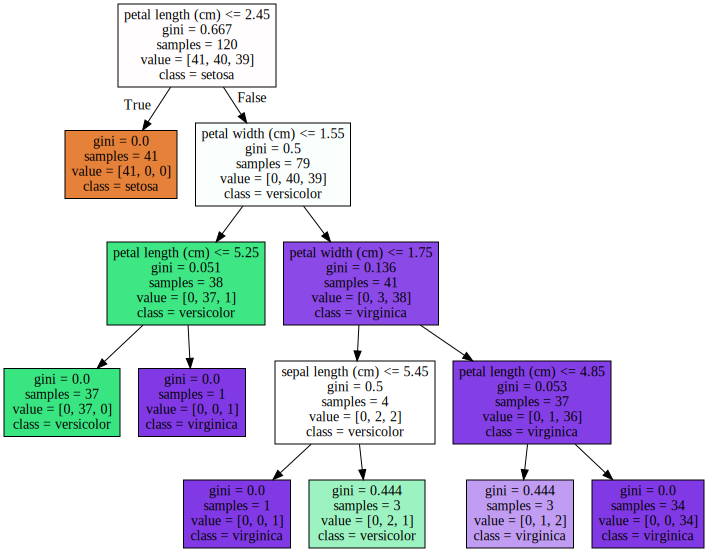

In [29]:
# DecicionTreeClassifier 생성 (min_samples_split=4로 상향)
decTree3 = DecisionTreeClassifier(min_samples_split=4 ,random_state=156)
decTree3.fit(X_train, y_train)
# min_samples_split  노드를 분할하기 위한 최소한의 샘플 데이터 수 
# 과적합 제어하는데 사용 default =2 작게 설정할수록 분할 노드가 많아져 과적합 증가


# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(decTree3, out_file="tree.dot", class_names = Iris_data.target_names, 
                           feature_names = Iris_data.feature_names, impurity=True, filled=True)

print('===============min_samples_split=4인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

===============min_samples_leaf=4인 경우의 Decision Tree 시각화==================


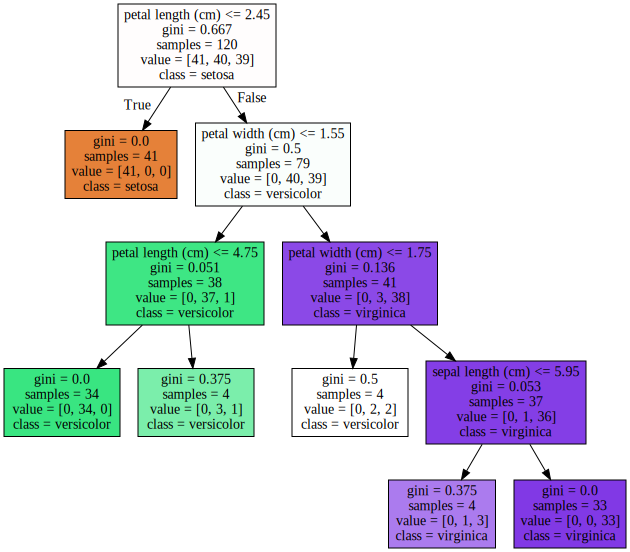

In [30]:
# DecicionTreeClassifier 생성 (min_samples_leaf=4로 상향)
decTree4 = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=156)
decTree4.fit(X_train, y_train)
# min_samples_leaf, min_samples_split과 함께 과적합 제어 용도, 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(decTree4, out_file="tree.dot", class_names = Iris_data.target_names, 
                           feature_names = Iris_data.feature_names, impurity=True, filled=True)

print('===============min_samples_leaf=4인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Feature Importance 시각화

Feature Importances:
[0.009 0.    0.557 0.435]

sepal length (cm): 0.009
sepal width (cm): 0.000
petal length (cm): 0.557
petal width (cm): 0.435


<AxesSubplot:>

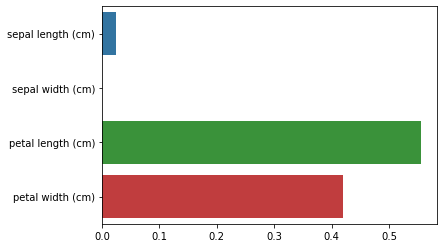

In [32]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(decTree3.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(Iris_data.feature_names, decTree3.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=decTree.feature_importances_, y=Iris_data.feature_names)

## Decision Tree의 과적합(Overfitting)

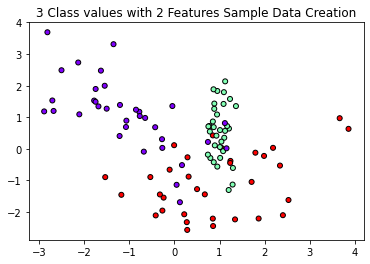

In [33]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample Data Creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                                                  n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor = 'k', cmap='rainbow')

In [34]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

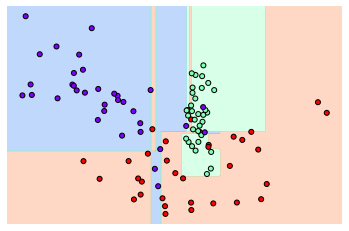

In [35]:
# 특정한 트리 생성에 제약이 없는(전체 default 값) Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

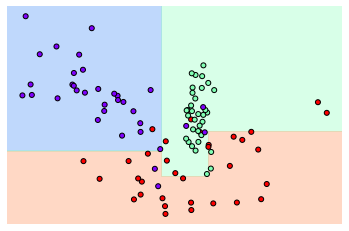

In [36]:
# 위의 경우 매우 얇은 영역으로 나타난 부분은 이상치에 해당하는데, 이런 이상치까지 모두 분류하기 위해 분할한 결과 결정 기준 경계가 많아졌습니다.
# →이런 경우 조금만 형태가 다른 데이터가 들어와도 정확도가 매우 떨어지게 됩니다.

# min_samples_leaf = 6 으로 설정한 Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
# Decision Tree의 과적합을 줄이기 위한 파라미터 튜닝
# (1) max_depth 를 줄여서 트리의 깊이 제한
# (2) min_samples_split 를 높여서 데이터가 분할하는데 필요한 샘플 데이터의 수를 높이기
# (3) min_samples_leaf 를 높여서 말단 노드가 되는데 필요한 샘플 데이터의 수를 높이기
# (4) max_features를 높여서 분할을 하는데 고려하는 feature의 수 제한